In [7]:
import numpy as np

import fasttext

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.words), sample)
        else:
            words = [word for word in model.words]
            
    word_vectors = np.array([model[w] for w in words])
    reduced = PCA().fit_transform(word_vectors)[:,:3]
    fig = plt.figure(figsize=(16,12))
    ax = Axes3D(fig)

    ax.scatter(reduced[:,0], reduced[:,1], reduced[:,2], cmap='Set1')
    for word, (x,y,z) in zip(words, reduced):
        ax.text(x+0.05, y+0.05, z+0.05, word)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

## FastText

In [18]:
fasttext_model = fasttext.train_unsupervised('data/budget_corpus.txt', ws=10)

In [28]:
fasttext_model.get_nearest_neighbors('currency')

[(0.9630756974220276, 'fdi'),
 (0.9385343194007874, 'impacted'),
 (0.9344848990440369, 'impact'),
 (0.9330310225486755, 'otherwise'),
 (0.9317337274551392, 'v'),
 (0.9279836416244507, 'vii'),
 (0.9267986416816711, 'however'),
 (0.9231896996498108, 'outside'),
 (0.9218661189079285, 'keep'),
 (0.9210138320922852, 'alternate')]

In [20]:
fasttext_model.get_analogies("cotton","poor","rich")

[(0.9044795036315918, 'silos'),
 (0.8797882795333862, 'consumer'),
 (0.8785866498947144, 'domestic'),
 (0.8752081990242004, 'petroleum'),
 (0.8650240898132324, 'input'),
 (0.8594076037406921, 'supplies'),
 (0.8572754859924316, 'waste'),
 (0.8547408580780029, 'oil'),
 (0.8543652296066284, 'steel'),
 (0.8530886173248291, 'five')]

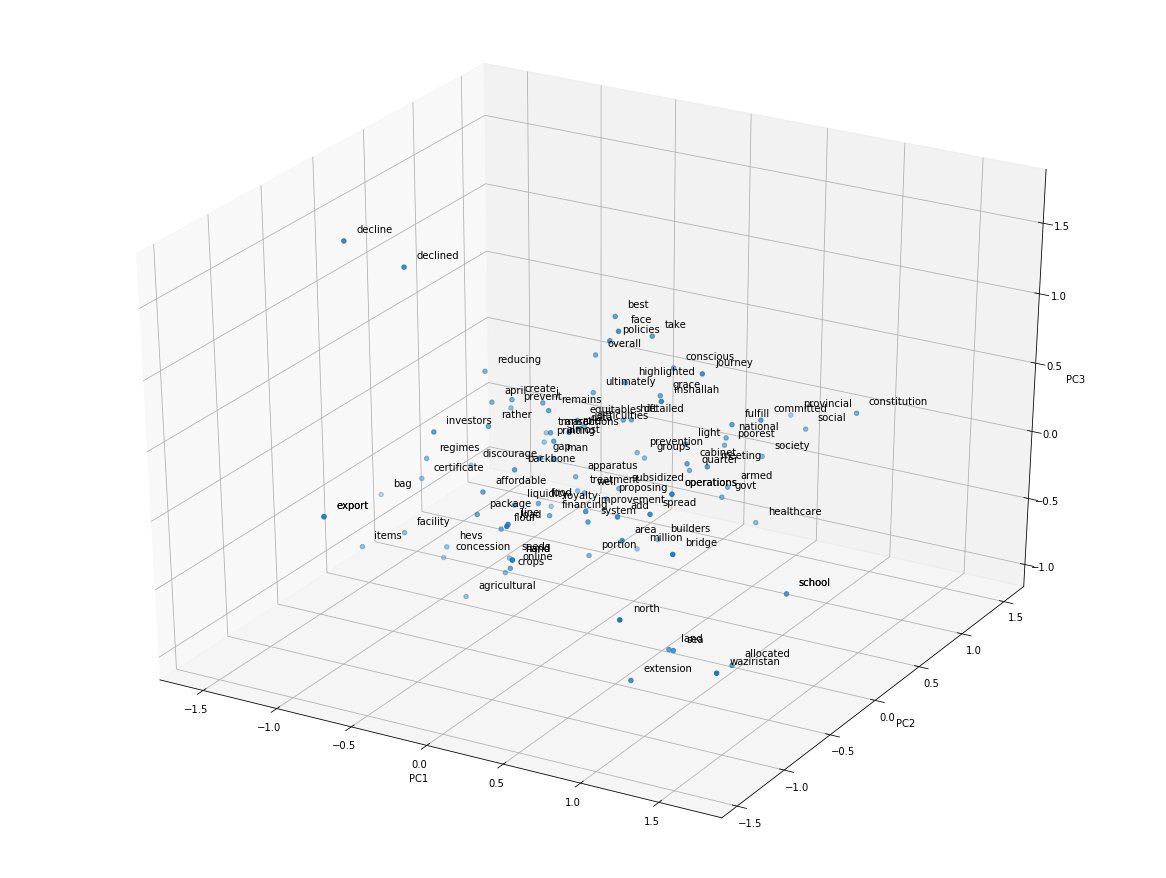

In [21]:
display_pca_scatterplot(fasttext_model,sample=100)

## Word2vec

## Doc2vec

In [22]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [23]:
docs = [" ".join(budget.processed_text) for budget in budget_list]

NameError: name 'budget_list' is not defined

In [24]:
tagged_data = [TaggedDocument(words=nltk.word_tokenize(_d), tags=[str(i)]) for i, _d in enumerate(docs)]

NameError: name 'docs' is not defined

In [25]:
max_epochs = 500
vec_size = 128
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    #print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

/Users/macbook/Documents/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


NameError: name 'tagged_data' is not defined

In [26]:
similar_doc = model.docvecs.most_similar('10')
print(similar_doc)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'